In [1]:
import sys, os 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

sys.path.append("/lustre/storeB/users/martinls/src/opendrift")

In [2]:
import matplotlib
import cartopy

In [3]:
%matplotlib inline

In [4]:
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_generic

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

np.random.seed(983214)

In [5]:
#o = OceanDrift(loglevel=20) # Lower log level will crash the notebook for anything but very small simulations
o = OceanDrift(loglevel=50)

o2 = OceanDrift(loglevel=50)

In [6]:
print(OceanDrift.required_variables)
print(OceanDrift.fallback_values)

# vertical profiles
print(OceanDrift.required_profiles)
print(OceanDrift.required_profiles_z_range)

['x_sea_water_velocity', 'y_sea_water_velocity', 'x_wind', 'y_wind', 'land_binary_mask']
{'x_sea_water_velocity': 0, 'y_sea_water_velocity': 0, 'x_wind': 0, 'y_wind': 0}
None
None


In [7]:
model_input_files = [
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc',
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071700.nc',
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071800.nc',
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071900.nc',
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072000.nc',
                'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc'
            ]

reader_norkyst = reader_netCDF_CF_generic.Reader(model_input_files)

r2 = reader_netCDF_CF_generic.Reader(model_input_files)
r2.variable_mapping['x_sea_water_velocity'] = 'ubar'
r2.variable_mapping['y_sea_water_velocity'] = 'vbar'

print(reader_norkyst)

Reader: ['https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071700.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071800.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071900.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072000.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc']
Projection: 
  +proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70
Coverage: [m]
  xmin: 0.000000   xmax: 2080800.000000   step: 800   numx: 2602
  ymin: 0.000000   ymax: 720800.000000   step: 800   numy: 902
  Corners (lon, lat):
    ( -1.58,  58.50)  ( 23.71,  75.32)
    (  9.19,  55.91)  ( 38.06,  70.03)
Vertical levels [m]: 
  

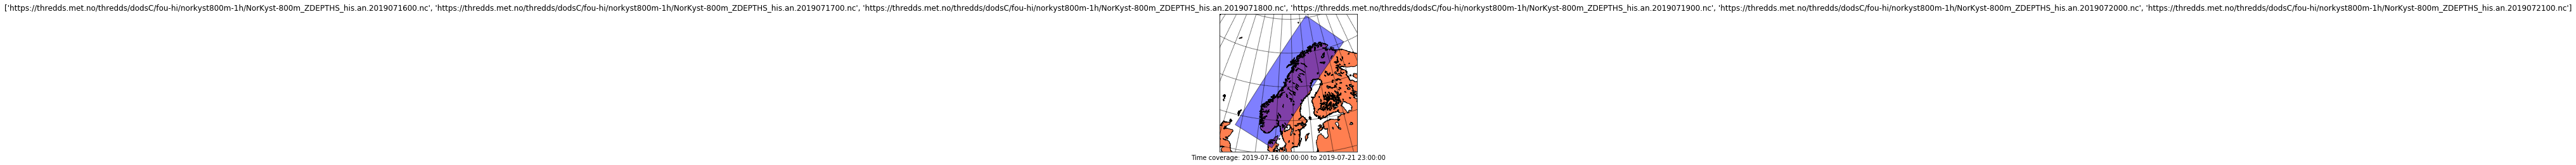

In [8]:
reader_norkyst.plot()

In [9]:
#from opendrift.readers import reader_basemap_landmask

#reader_basemap = reader_basemap_landmask.Reader(
#                       llcrnrlon=-1.58228, llcrnrlat=55.9084,
#                       urcrnrlon=38.064, urcrnrlat=75.3155,
#                       resolution='h', projection='merc')

#lons = reader_norkyst.lon
#lats = reader_norkyst.lat

#reader_basemap = reader_basemap_landmask.Reader(
#            llcrnrlon=lons.min(),
#            llcrnrlat=lats.min(),
#            urcrnrlon=lons.max(),
#            urcrnrlat=lats.max(),
#            resolution="h",
#            projection="merc")


In [10]:
#o.add_reader([reader_basemap, reader_norkyst])
o.add_reader([reader_norkyst])

o2.add_reader(r2)

In [11]:
print(o)

Model:	OceanDrift     (OpenDrift version 1.1.0rc2)
	0 active PassiveTracer particles  (0 deactivated, 0 scheduled)
Projection: +proj=stere +ellps=WGS84 +lat_0=90.0 +lat_ts=60.0 +x_0=3192800 +y_0=1784000 +lon_0=70
-------------------
Environment variables:
  -----
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) ['https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071700.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071800.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071900.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072000.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc']
  -----
Readers not added for the follo

In [12]:
# seed in this domain:
# 66.20397967604464 71.40085223238162
# 9.43433810743634 22.273689006093747


o.seed_elements(lon=4, lat=60, number=10, radius=1000,
                    time=reader_norkyst.start_time)

o2.seed_elements(lon=4, lat=60, number=10, radius=1000,
                    time=reader_norkyst.start_time)

In [13]:
# TODO: Check: No wind drift factor for OceanDrift

#print(o.list_configspec())

# This should work according to OpenDrift docs. Have commented out line self.advect_wind() from oceandrift.py to remove wind drag, as a workaround
#o.set_config('wind_drift_factor', 0.0)

#wind_drift_factor = o.get_config('drift:wind_drift_factor')

In [14]:
o.run(end_time=reader_norkyst.end_time, time_step=300,
          time_step_output=300, outfile='opendrift.nc')#,
          #export_variables=['density', 'water_content'])

o2.run(end_time=reader_norkyst.end_time, time_step=300,
          time_step_output=300)

  scalar = np.sqrt(u_component**2 + v_component**2)

  fig.canvas.draw()



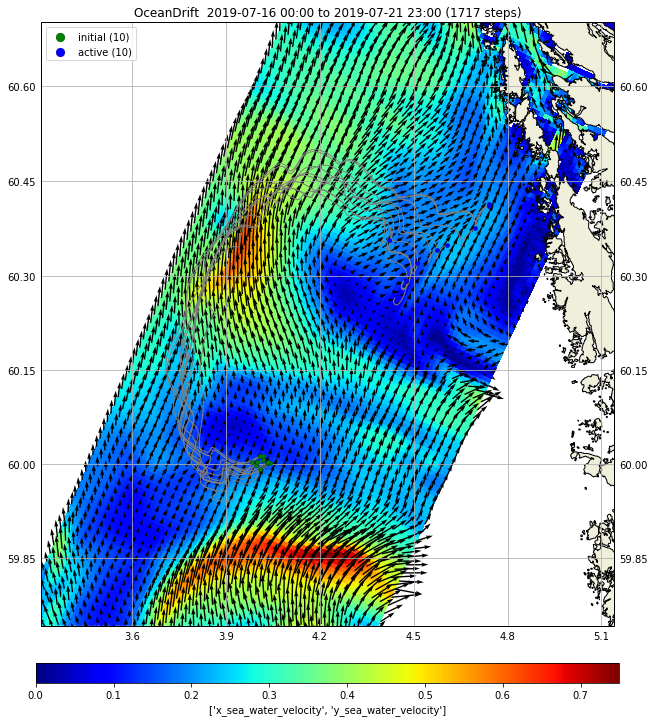

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0d08813668>,
 <module 'matplotlib.pyplot' from '/home/martinls/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [15]:
o.plot(background=['x_sea_water_velocity', 'y_sea_water_velocity'])

In [16]:
print(o)

--------------------
Reader performance:
--------------------
['https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071700.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071800.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071900.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072000.nc', 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc']
 0:00:20.8  total
 0:00:00.2  preparing
 0:00:17.7  reading
 0:00:01.8  interpolation
 0:00:01.0  interpolation_time
 0:00:00.0  masking
--------------------
global_landmask
 0:00:00.1  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
Perform

In [17]:
print(o.elements)

print(o.elements.lon)
print(o.elements.lat)



ID: [ 1  2  3  4  5  6  7  8  9 10]
status: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
age_seconds: [514800.0 514800.0 514800.0 514800.0 514800.0 514800.0 514800.0 514800.0
 514800.0 514800.0]
lon: [4.475200176239014 4.74000358581543 4.6962432861328125 4.476315498352051
 4.605236053466797 4.573675632476807 4.739178657531738 4.446393966674805
 4.5114054679870605 4.421119213104248]
lat: [60.292388916015625 60.41149139404297 60.375675201416016 60.2942008972168
 60.349430084228516 60.341426849365234 60.413700103759766
 60.266422271728516 60.31990051269531 60.35633087158203]
z: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
wind_drift_factor: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]

[4.475200176239014 4.74000358581543 4.6962432861328125 4.476315498352051
 4.605236053466797 4.573675632476807 4.739178657531738 4.446393966674805
 4.5114054679870605 4.421119213104248]
[60.292388916015625 60.41149139404297 60.375675201416016 60.2942008972168
 60.349430084228516 60.341426849365234 60.413700103759766


In [18]:
t = o.get_time_array()[0]
for i in range(1,len(t)):
    t[i] = (t[i]-t[0]).total_seconds()
t[0] = 0.0
t = np.array(t)
    
print('t.shape ', t.shape)
print('t: ', t[:4], '...', t[-4:])

lon, lat = o.get_lonlats()
print('lon.shape, lats.shape: ', lon.shape, lat.shape)

x, y = reader_norkyst.lonlat2xy(lon, lat)

print('x.shape, y.shape: ', x.shape, y.shape)

np.save('t_x_y_from_opendrift', [t, x, y])

t.shape  (1717,)
t:  [  0. 300. 600. 900.] ... [513900. 514200. 514500. 514800.]
lon.shape, lats.shape:  (10, 1717) (10, 1717)
x.shape, y.shape:  (10, 1717) (10, 1717)


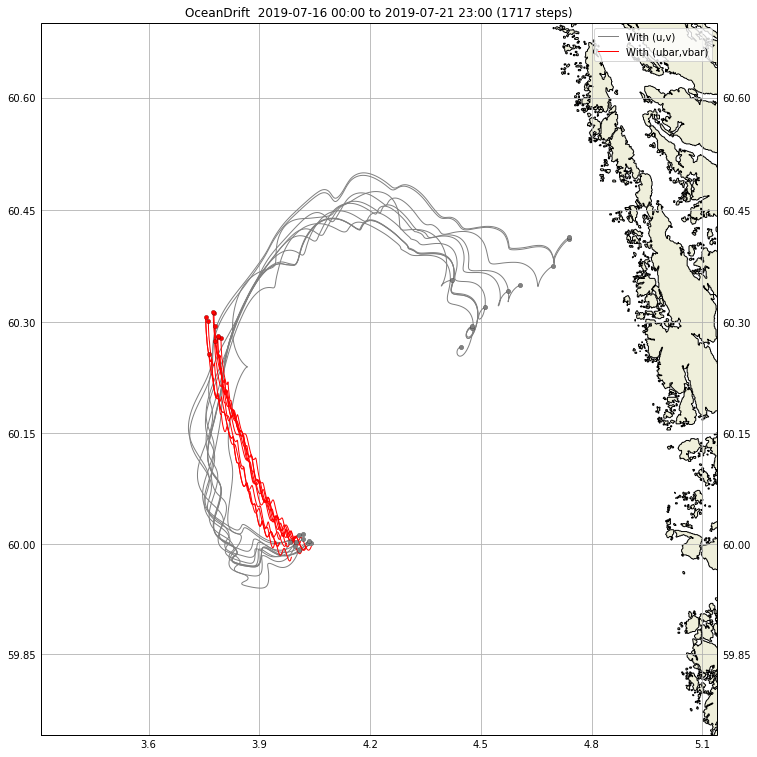

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0b27e9acc0>,
 <module 'matplotlib.pyplot' from '/home/martinls/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [19]:
# Compare x_sea_water_velocity/y_sea_water_velocity and ubar/vbar
o.plot(compare=o2, legend=['With (u,v)', 'With (ubar,vbar)'])